In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2861 - accuracy: 0.8952 - val_loss: 0.3160 - val_accuracy: 0.8857
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2451 - accuracy: 0.9101 - val_loss: 0.2683 - val_accuracy: 0.9023
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2145 - accuracy: 0.9205 - val_loss: 0.2766 - val_accuracy: 0.8987
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1900 - accuracy: 0.9297 - val_loss: 0.2527 - val_accuracy: 0.9077
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1666 - accuracy: 0.9376 - val_loss: 0.2597 - val_accuracy: 0.9106
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1483 - accuracy: 0.9445 - val_loss: 0.2581 - val_accuracy: 0.9111
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1308 - accuracy: 0.9515 - val_loss: 0.2646 -

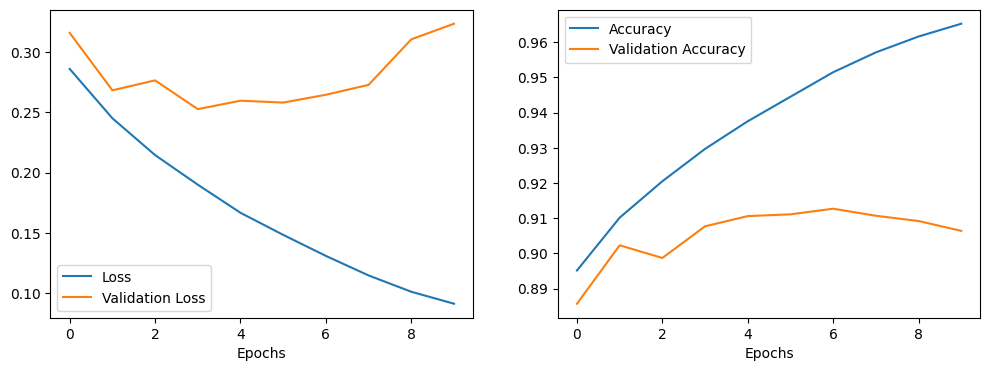

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test.reshape(-1, 28, 28, 1))
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 11ms/step


In [ ]:
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)
class_report = classification_report(np.argmax(y_test, axis=1), predicted_labels)

print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[872   1  28  23   1   0  67   0   8   0]
 [  4 985   2   5   1   0   1   0   2   0]
 [ 18   0 915   8  25   0  31   0   3   0]
 [ 10   8  22 896  39   1  20   0   4   0]
 [  2   0  98  17 842   0  41   0   0   0]
 [  0   0   1   0   0 971   0  10  16   2]
 [122   2  96  29  62   0 675   0  14   0]
 [  0   0   0   0   0  10   0 972   4  14]
 [  2   0   5   4   1   0   1   0 987   0]
 [  1   0   0   0   0   6   0  42   2 949]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.78      0.92      0.84      1000
           3       0.91      0.90      0.90      1000
           4       0.87      0.84      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.81      0.68      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.95      0.99      0